# Exercise: Clustering Algorithms with Scikit Learn
<img src="../Notebooks/IMG/sk-logo.png" width=200>

* ***SkLearn*** API Reference: https://scikit-learn.org/stable/modules/classes.html
* ***SkLearn*** Clustering Algorithms: https://scikit-learn.org/stable/modules/clustering.html#clustering

In [3]:
#setup env
import time
import warnings

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

import pandas as pd


In [4]:
#helper calls
n_samples = 1500
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)

#generating Data Sets A-F
A = datasets.make_circles(n_samples=n_samples, factor=.5,noise=.05)[0]
B = datasets.make_moons(n_samples=n_samples, noise=.05)[0]
C = datasets.make_blobs(n_samples=n_samples, random_state=8)[0]
D = np.random.rand(n_samples, 2)
E = (X_aniso, y)[0]
F = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)[0]

## Exercise 1
Plot all raw data sets A-F in one figure.

Hints: use ```scatter``` plots and ```subfigures```.

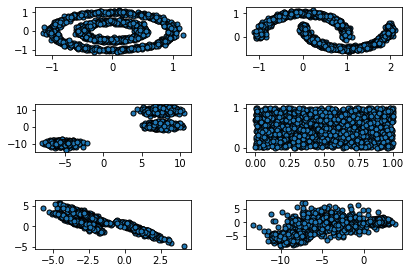

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=3)
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=1.0,
                    wspace=0.35)
plt.subplot(321)
plt.scatter(A[:, 0], A[:, 1], marker='o', 
            s=25, edgecolor='k')
plt.subplot(322)
plt.scatter(B[:, 0], B[:, 1], marker='o', 
            s=25, edgecolor='k')
plt.subplot(323)
plt.scatter(C[:, 0], C[:, 1], marker='o', 
            s=25, edgecolor='k')
plt.subplot(324)
plt.scatter(D[:, 0], D[:, 1], marker='o', 
            s=25, edgecolor='k')
plt.subplot(325)
plt.scatter(E[:, 0], E[:, 1], marker='o', 
            s=25, edgecolor='k')
plt.subplot(326)
plt.scatter(F[:, 0], F[:, 1], marker='o', 
            s=25, edgecolor='k')

## Exercise 2
Perform ```K-Means``` clustering on all data sets: https://scikit-learn.org/stable/modules/clustering.html#k-means
* 2.1 plot all results
* 2.2 manually try to find the best $k$ for each data set (by visual evaluation)
* 2.3 Use the ```K-Means++``` initialization 

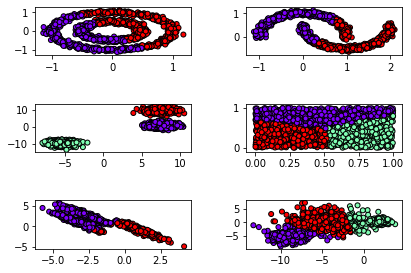

In [6]:
from sklearn.cluster import KMeans

fig, axes = plt.subplots(nrows=2, ncols=3)
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=1.0,
                    wspace=0.35)

kmeans = KMeans(n_clusters=2, random_state=0).fit(A)
plt.subplot(321)
plt.scatter(A[:, 0], A[:, 1], marker='o', 
            s=25, edgecolor='k', c=kmeans.labels_, cmap='rainbow')

kmeans = KMeans(n_clusters=2, random_state=0).fit(B)
plt.subplot(322)
plt.scatter(B[:, 0], B[:, 1], marker='o', 
            s=25, edgecolor='k', c=kmeans.labels_, cmap='rainbow')

kmeans = KMeans(n_clusters=3, random_state=0).fit(C)
plt.subplot(323)
plt.scatter(C[:, 0], C[:, 1], marker='o', 
            s=25, edgecolor='k', c=kmeans.labels_, cmap='rainbow')

kmeans = KMeans(n_clusters=3, random_state=0).fit(D)
plt.subplot(324)
plt.scatter(D[:, 0], D[:, 1], marker='o', 
            s=25, edgecolor='k', c=kmeans.labels_, cmap='rainbow')

kmeans = KMeans(n_clusters=2, random_state=0).fit(E)
plt.subplot(325)
plt.scatter(E[:, 0], E[:, 1], marker='o', 
            s=25, edgecolor='k', c=kmeans.labels_, cmap='rainbow')

kmeans = KMeans(n_clusters=3, random_state=0).fit(F)
plt.subplot(326)
plt.scatter(F[:, 0], F[:, 1], marker='o', 
            s=25, edgecolor='k', c=kmeans.labels_, cmap='rainbow')

In [7]:
# from sklearn.cluster import KMeans

# km = KMeans(
#     n_clusters=2, init='random',
#     n_init=10, max_iter=5000, 
#     tol=1e-04, random_state=0
# )
# y_km = km.fit_predict(A)

# # plot the 3 clusters
# plt.scatter(
#     A[y_km == 0, 0], A[y_km == 0, 1],
#     s=50, c='lightgreen',
#     marker='s', edgecolor='black',
#     label='cluster 1'
# )

# plt.scatter(
#     A[y_km == 1, 0], A[y_km == 1, 1],
#     s=50, c='orange',
#     marker='o', edgecolor='black',
#     label='cluster 2'
# )

# plt.scatter(
#     A[y_km == 2, 0], A[y_km == 2, 1],
#     s=50, c='lightblue',
#     marker='v', edgecolor='black',
#     label='cluster 3'
# )

# # plot the centroids
# plt.scatter(
#     km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
#     s=250, marker='*',
#     c='red', edgecolor='black',
#     label='centroids'
# )
# plt.legend(scatterpoints=1)
# plt.grid()
# plt.show()


## Exercise 3
Performs ```DBSCAN``` clustering on all data sets and plot all results: https://scikit-learn.org/stable/modules/clustering.html#dbscan

In [8]:
def dbscan(X, eps, min_samples):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(X)
    y_pred = db.fit_predict(X)
    plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
    plt.title("DBSCAN")

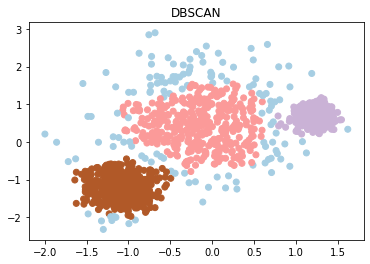

In [9]:
dbscan(F, eps=0.18, min_samples=10) #for faster testing purpose


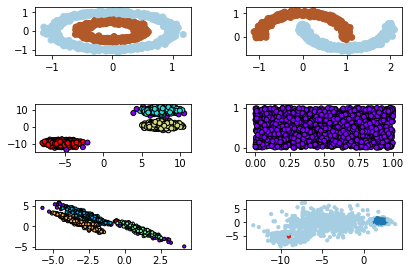

In [10]:
from sklearn.cluster import DBSCAN

fig, axes = plt.subplots(nrows=2, ncols=3)
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=1.0,
                    wspace=0.35)

dbscan = DBSCAN(eps=0.2, min_samples=3).fit(A)
plt.subplot(321)
plt.scatter(A[:,0], A[:,1],c=dbscan.labels_, cmap='Paired')

dbscan = DBSCAN(eps=0.2, min_samples=3).fit(B)
plt.subplot(322)
plt.scatter(B[:,0], B[:,1],c=dbscan.labels_, cmap='Paired')


dbscan = DBSCAN(eps=0.7, min_samples=3).fit(C)
plt.subplot(323)
plt.scatter(C[:, 0], C[:, 1], marker='o', 
            s=25, edgecolor='k', c=dbscan.labels_, cmap='rainbow')

dbscan = DBSCAN(eps=0.1, min_samples=6).fit(D)
plt.subplot(324)
plt.scatter(D[:, 0], D[:, 1], marker='o', 
            s=25, edgecolor='k', c=dbscan.labels_, cmap='rainbow')

dbscan = DBSCAN(eps=0.25, min_samples=5).fit(E)
plt.subplot(325)
plt.scatter(E[:, 0], E[:, 1], marker='o', 
            s=10, edgecolor='k', c=dbscan.labels_, cmap='rainbow')

dbscan = DBSCAN(eps=0.18, min_samples=10).fit(F)
plt.subplot(326)
plt.scatter(F[:,0], F[:,1],c=dbscan.labels_, cmap='Paired', s=10)


